In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('Algerian_forest_fires_dataset_CLEANED.csv')
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [4]:
# deleting uneccessory columns
df.drop(['day', 'month', 'year'], axis=1, inplace=True)

In [5]:
# Encoding
df['Classes'] = np.where(df['Classes'].str.contains('not fire'), 0,1)

In [6]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [7]:
# making independent and dependent feature

X = df.drop('FWI',axis=1)
Y = df['FWI']

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

<Axes: >

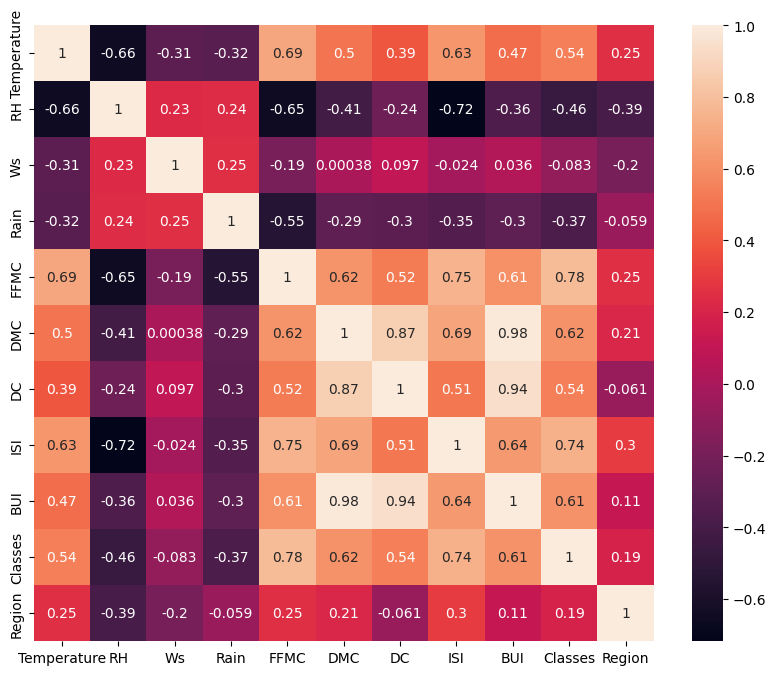

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(x_train.corr(),annot= True)

In [58]:
# making a function , which identify input features which are high correlated with output feature
def correlation(dataframe, threshold):
    column_name = set()
    corr_matrix = dataframe.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                column = corr_matrix.columns[i]
                column_name.add(column)
    return column_name
correlation(x_test, .90)

set()

In [59]:
# no removing those input fearutes from x train and x test
x_train = x_train.drop(correlation(x_train, .85), axis=1)
x_test = x_test.drop(correlation(x_train, .85), axis=1)

In [60]:
# stamdardising or scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### What does standardising do? -- look at graphs

<Axes: >

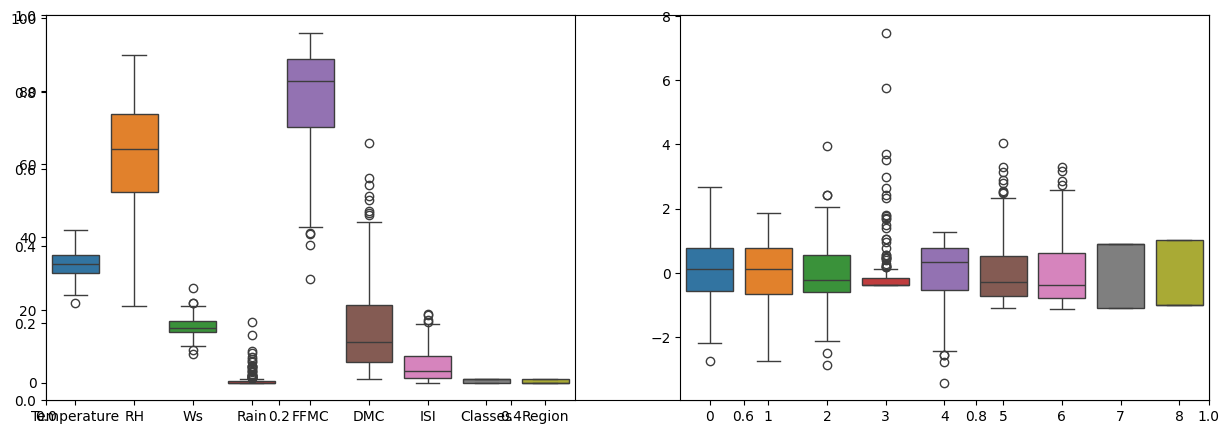

In [61]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(x_train)
plt.subplot(1,2,2)
sns.boxplot(x_train_scaled)

#### before scaling, data was ambigous and in different units, now data after scaling in a standard way.

# Linear Regression Model

0.5468236465249978
0.9847657384266951


Text(0.5, 1.0, 'MULTI LINEAR REGRESSION MODEL')

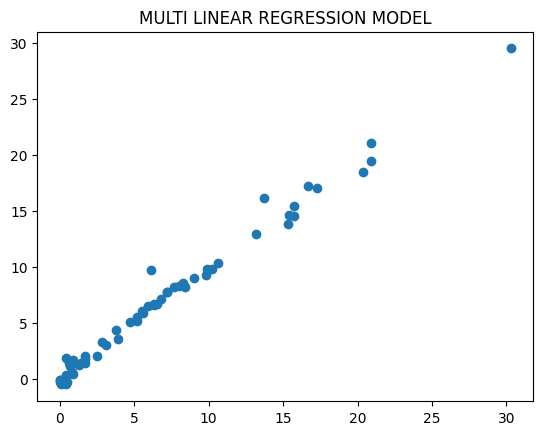

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
l_reg = LinearRegression()
l_reg.fit(x_train_scaled, y_train)
y_pred = l_reg.predict(x_test_scaled)
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Means Absolute Error : ', MAE)
print('R2 Score: ', r2)
plt.scatter(y_test, y_pred)
plt.title('MULTI LINEAR REGRESSION MODEL')

# Lasso Regression Model

1.133175994914409
0.9492020263112388


Text(0.5, 1.0, 'LASSO REGRESSION MODEL')

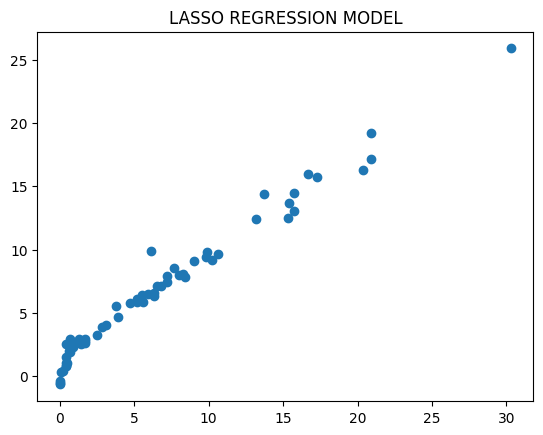

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score
lasso = Lasso()
lasso.fit(x_train_scaled, y_train)
y_pred = lasso.predict(x_test_scaled)
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Means Absolute Error : ', MAE)
print('R2 Score: ', r2)
plt.scatter(y_test, y_pred)
plt.title('LASSO REGRESSION MODEL')

# Ridge Regression Model

0.5642305340105715
0.9842993364555512


Text(0.5, 1.0, 'RIDGE REGRESSION MODEL')

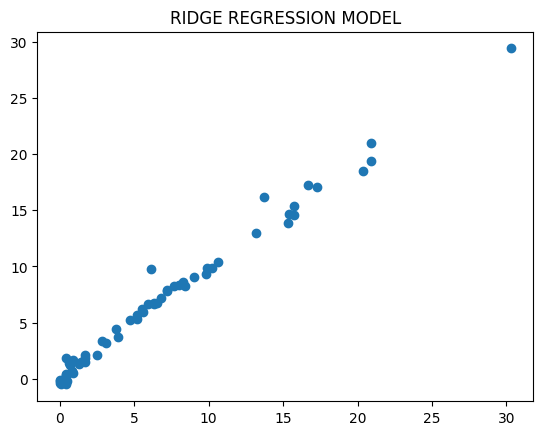

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score
ridge = Ridge()
ridge.fit(x_train_scaled, y_train)
y_pred = ridge.predict(x_test_scaled)
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Means Absolute Error : ', MAE)
print('R2 Score: ', r2)
plt.scatter(y_test, y_pred)
plt.title('RIDGE REGRESSION MODEL')

# Elasticnet Regression Model

Means Absolute Error :  1.8822353634896005
R2 Score:  0.8753460589519703


Text(0.5, 1.0, 'ELASTICNET REGRESSION MODEL')

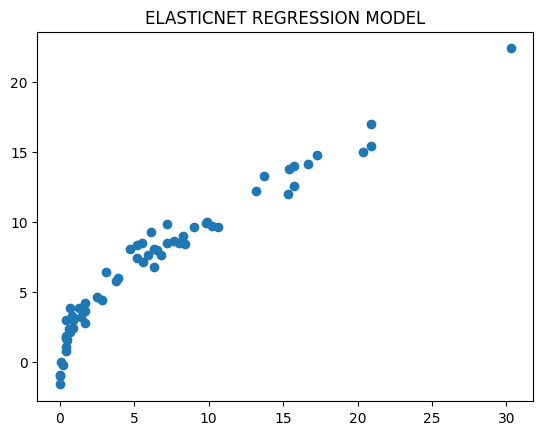

In [79]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, r2_score
EN = ElasticNet()
EN.fit(x_train_scaled, y_train)
y_pred = EN.predict(x_test_scaled)
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Means Absolute Error : ', MAE)
print('R2 Score: ', r2)
plt.scatter(y_test, y_pred)
plt.title('ELASTICNET REGRESSION MODEL')

# Hypertunning


## Cross validation Lasso

In [96]:
from sklearn.linear_model import LassoCV
l_cv = LassoCV(cv=5)
l_cv.fit(x_train_scaled, y_train)
l_cv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

Means Absolute Error :  0.619970115826343
R2 Score:  0.9820946715928275


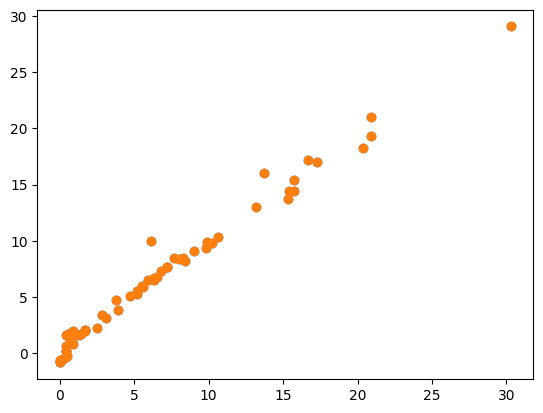

In [97]:
y_pred= l_cv.predict(x_test_scaled)
plt.scatter(y_test,y_pred)
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Means Absolute Error : ', MAE)
print('R2 Score: ', r2)
plt.scatter(y_test, y_pred)

## Cross Validation - Ridge


Means Absolute Error :  0.5642305340105715
R2 Score:  0.9842993364555512


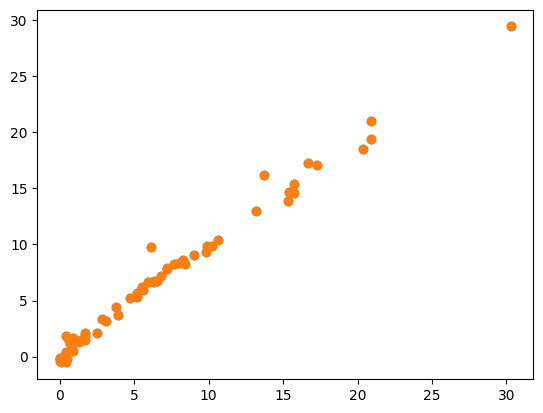

In [99]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=5)
ridgecv.fit(x_train_scaled, y_train)
y_pred= ridgecv.predict(x_test_scaled)
plt.scatter(y_test,y_pred)
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Means Absolute Error : ', MAE)
print('R2 Score: ', r2)
plt.scatter(y_test, y_pred)

## Cross Validation - ElasticNet



Means Absolute Error :  0.6575946731430898
R2 Score:  0.9814217587854941


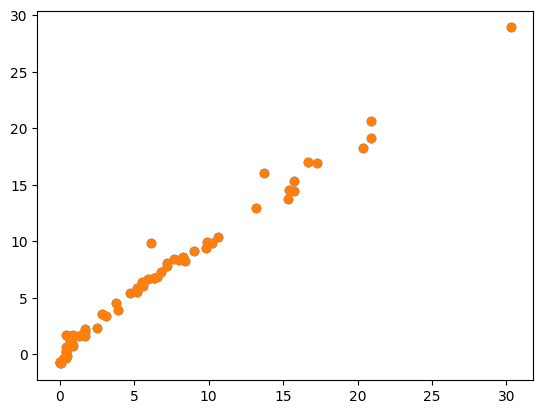

In [100]:
from sklearn.linear_model import ElasticNetCV
elasticcv = ElasticNetCV(cv=5)
elasticcv.fit(x_train_scaled, y_train)
y_pred= elasticcv.predict(x_test_scaled)
plt.scatter(y_test,y_pred)
MAE = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Means Absolute Error : ', MAE)
print('R2 Score: ', r2)
plt.scatter(y_test, y_pred)